Call Option Price: 10.45
Put Option Price: 5.57
Monte Carlo Call Option Price: 10.47


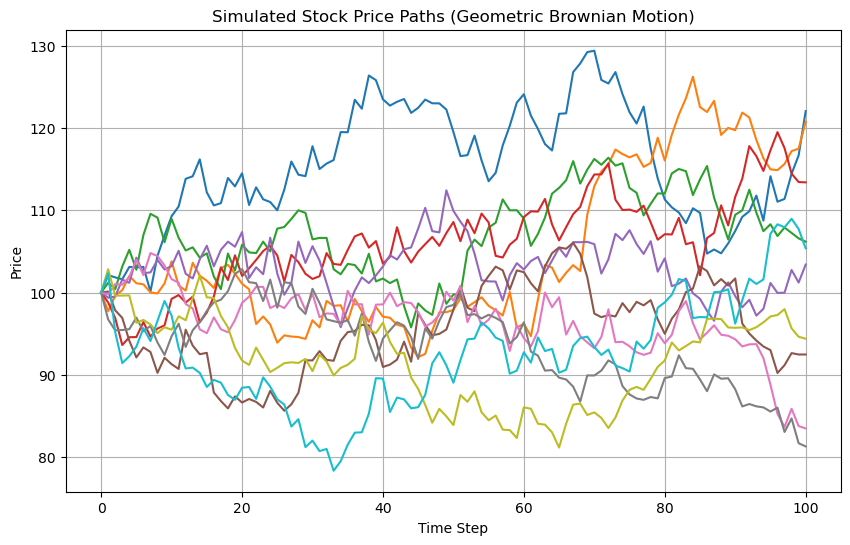

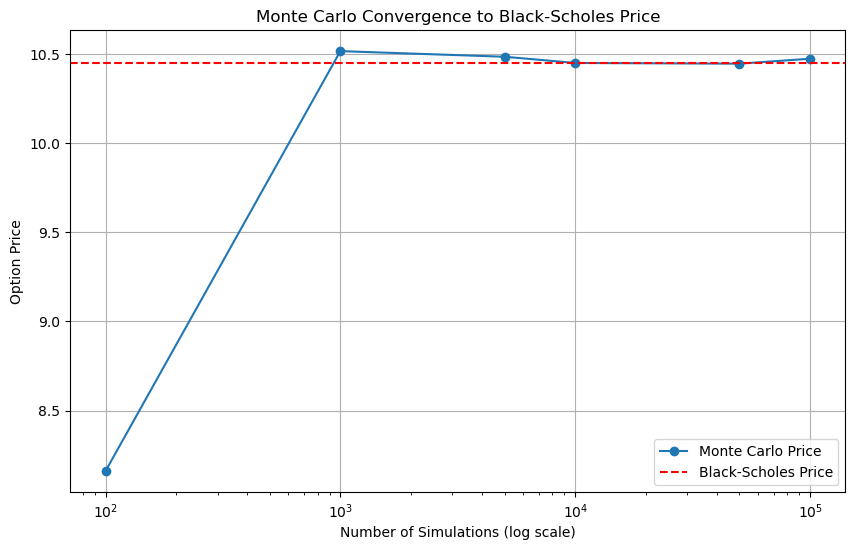

In [10]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for a European call
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example inputs
S = 100      # stock price
K = 100      # strike price
T = 1        # time to maturity (1 year)
r = 0.05     # risk-free rate (5%)
sigma = 0.2  # volatility (20%)

call = black_scholes_call(S, K, T, r, sigma)
print("Call Option Price:", round(call, 2))

# Black-Scholes formula for a European put
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Try it out
put = black_scholes_put(S, K, T, r, sigma)
print("Put Option Price:", round(put, 2))

# Monte Carlo pricing of European call option
def monte_carlo_call(S, K, T, r, sigma, simulations=100000):
    np.random.seed(42)  # for reproducibility
    Z = np.random.standard_normal(simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoff)
    return call_price

mc_call = monte_carlo_call(S, K, T, r, sigma)
print("Monte Carlo Call Option Price:", round(mc_call, 2))

# Simulate multiple price paths
def simulate_paths(S0, T, r, sigma, steps=100, n_paths=10):
    dt = T / steps
    paths = np.zeros((steps + 1, n_paths))
    paths[0] = S0
    for t in range(1, steps + 1):
        z = np.random.standard_normal(n_paths)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return paths

# Plot the paths
paths = simulate_paths(S, T, r, sigma)
plt.figure(figsize=(10, 6))
plt.plot(paths)
plt.title("Simulated Stock Price Paths (Geometric Brownian Motion)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.show()

simulations = [100, 1000, 5000, 10000, 50000, 100000]
mc_prices = []

for n in simulations:
    price = monte_carlo_call(S, K, T, r, sigma, simulations=n)
    mc_prices.append(price)

plt.figure(figsize=(10,6))
plt.plot(simulations, mc_prices, marker='o', label='Monte Carlo Price')
plt.axhline(y=call, color='r', linestyle='--', label='Black-Scholes Price')
plt.xscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Option Price')
plt.title('Monte Carlo Convergence to Black-Scholes Price')
plt.legend()
plt.grid(True)
plt.show()
